# Prioritizing Hypotheses and A/B Test Analysis

## Project description

The goal of this project for an analyst in  big online store is to support decision making together with the marketing department to boost revenue. 
Tasks are basing on data about visits, orders and hypotheses:
- make data assesment
- prioritize these hypotheses
- launch an A/B test
- analyze the results
- provide recommendations

## Part 1. Prioritizing Hypotheses
The file hypotheses_us.csv contains nine hypotheses on boosting an online store's revenue with Reach, Impact, Confidence, and Effort specified for each.
The task is to:
* 		Apply the ICE framework to prioritize hypotheses. Sort them in descending order of priority.
* 		Apply the RICE framework to prioritize hypotheses. Sort them in descending order of priority.
* 		Show how the prioritization of hypotheses changes when you use RICE instead of ICE. Provide an explanation for the changes.


In [1]:
!pip install -Uq seaborn --user
!pip install -Uq plotly --user

In [2]:
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
import plotly.express as px
import plotly.graph_objects as go

In [4]:
import math
from scipy import stats

In [5]:
#customizing the dataframe so that the hypotheses are fully displayed
pd.set_option('max_colwidth', 400)

In [6]:
dfh = pd.read_csv('hypotheses_us.csv',  sep=';')

In [7]:
dfh

,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. This will bring 30% more users,3,10,8,6
1,Launch your own delivery service. This will shorten delivery time,2,5,4,10
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,8,3,7,3
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,8,3,3,8
4,Change the background color on the main page. This will increase user engagement,3,1,1,1
5,Add a customer review page. This will increase the number of orders,3,2,2,3
6,Show banners with current offers and sales on the main page. This will boost conversion,5,3,8,3
7,Add a subscription form to all the main pages. This will help you compile a mailing list,10,7,8,5
8,Launch a promotion that gives users discounts on their birthdays,1,9,9,5


### Apply the ICE framework to prioritize hypotheses. Sort them in descending order of priority.

In [8]:
dfh['ICE'] = (dfh['Impact'] * dfh['Confidence']) / dfh['Effort']

In [9]:
dfh[['Hypothesis', 'ICE']].sort_values(by='ICE', ascending=False)

,Hypothesis,ICE
8,Launch a promotion that gives users discounts on their birthdays,16.200000
0,Add two new channels for attracting traffic. This will bring 30% more users,13.333333
7,Add a subscription form to all the main pages. This will help you compile a mailing list,11.200000
6,Show banners with current offers and sales on the main page. This will boost conversion,8.000000
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,7.000000
1,Launch your own delivery service. This will shorten delivery time,2.000000
5,Add a customer review page. This will increase the number of orders,1.333333
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,1.125000
4,Change the background color on the main page. This will increase user engagement,1.000000


Hypothesis 'Launch a promotion that gives users discounts on their birthdays' and 'Add two new channels for attracting traffic. This will bring 30% more users' as they have high levels of impact and confidence with medium effort. 'Add a subscription form to all the main pages. This will help you compile a mailing list' goes third.

### Apply the RICE framework to prioritize hypotheses. Sort them in descending order of priority.

In [10]:
dfh['RICE'] = (dfh['Reach'] * dfh['Impact'] * dfh['Confidence']) / dfh['Effort']

In [11]:
dfh[['Hypothesis', 'RICE']].sort_values(by ='RICE', ascending=False)

,Hypothesis,RICE
7,Add a subscription form to all the main pages. This will help you compile a mailing list,112.0
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,56.0
0,Add two new channels for attracting traffic. This will bring 30% more users,40.0
6,Show banners with current offers and sales on the main page. This will boost conversion,40.0
8,Launch a promotion that gives users discounts on their birthdays,16.2
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,9.0
1,Launch your own delivery service. This will shorten delivery time,4.0
5,Add a customer review page. This will increase the number of orders,4.0
4,Change the background color on the main page. This will increase user engagement,3.0


In RICE, comparing to ICE, hypothesis 'Add a subscription form to all the main pages. This will help you compile a mailing list' moving up from 3rd to 1st place with a big difference, almost twice higher score (112 and 56 accordingly). At the same time, hypothesis 'Launch a promotion that gives users discounts on their birthdays' has score 7 times less (16,2), because of low reach score.

### Show how the prioritization of hypotheses changes when you use RICE instead of ICE. Provide an explanation for the changes.

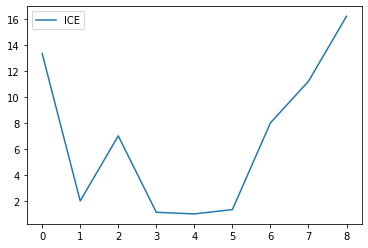

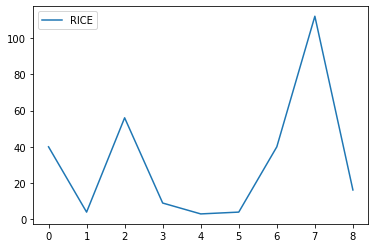

In [12]:
dfh[['Hypothesis', 'ICE']].plot(y='ICE')
dfh[['Hypothesis', 'RICE']].plot(y='RICE')
plt.show()

Prioritization of hypotheses changes significanlty depending on the level reach score, the main difference between two approaches (ICE and RICE). Some hypotheses like 1, 3-5 have low scores in both frameworks.

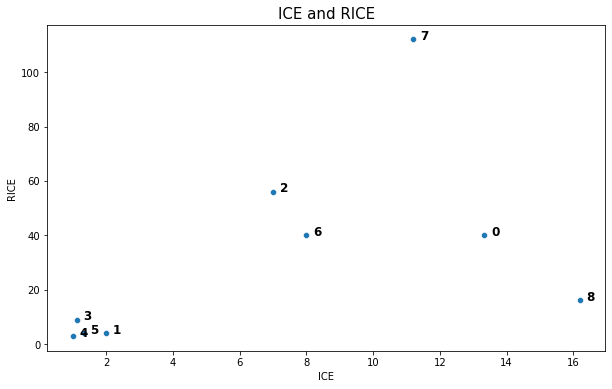

In [13]:
plt.figure(figsize=(10,6))
plt.title('ICE and RICE', size=15)
sns.scatterplot(x=dfh['ICE'], y=dfh['RICE'])
for line in range(0,dfh.shape[0]):
     plt.text(dfh.ICE[line]+0.2, 
              dfh.RICE[line], 
              dfh.index[line], 
              horizontalalignment='left', size='large', color='black', weight='bold')
plt.show()

## Part 2. A/B Test Analysis
You carried out an A/B test and got the results described in the files orders_us.csv and visits_us.csv.
Task
Analyze the A/B test:
* 		Graph cumulative revenue by group. Make conclusions and conjectures.
* 		Graph cumulative average order size by group. Make conclusions and conjectures.
* 		Graph the relative difference in cumulative average order size for group B compared with group A. Make conclusions and conjectures.
* 		Calculate each group's conversion rate as the ratio of orders to the number of visits for each day. Plot the daily conversion rates of the two groups and describe the difference. Draw conclusions and make conjectures.
* 		Plot a scatter chart of the number of orders per user. Make conclusions and conjectures.
* 		Calculate the 95th and 99th percentiles for the number of orders per user. Define the point at which a data point becomes an anomaly.
* 		Plot a scatter chart of order prices. Make conclusions and conjectures.
* 		Calculate the 95th and 99th percentiles of order prices. Define the point at which a data point becomes an anomaly.
* 		Find the statistical significance of the difference in conversion between the groups using the raw data. Make conclusions and conjectures.
* 		Find the statistical significance of the difference in average order size between the groups using the raw data. Make conclusions and conjectures.
* 		Find the statistical significance of the difference in conversion between the groups using the filtered data. Make conclusions and conjectures.
* 		Find the statistical significance of the difference in average order size between the groups using the filtered data. Make conclusions and conjectures.
* 		Make a decision based on the test results. The possible decisions are: 1. Stop the test, consider one of the groups the leader. 2. Stop the test, conclude that there is no difference between the groups. 3. Continue the test.

In [14]:
df_o = pd.read_csv('orders_us.csv', sep=',')

In [15]:
df_o.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


In [16]:
df_o.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   transactionId  1197 non-null   int64  
 1   visitorId      1197 non-null   int64  
 2   date           1197 non-null   object 
 3   revenue        1197 non-null   float64
 4   group          1197 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 46.9+ KB


In [17]:
df_o.pivot_table(index='group', values='date', aggfunc='count')

,date
group,
A,557
B,640


In [18]:
df_o.pivot_table(index='transactionId', values='group', aggfunc='count').sort_values(by='group', ascending=False)

,group
transactionId,
1062393,1
2883105032,1
2875229767,1
2872509092,1
2866469834,1
...,...
1476831880,1
1476390797,1
1473132782,1


There are no duplicates in transactionId column.

In [19]:
df_o.groupby(['visitorId'])['group'].nunique().reset_index().query('group>1')

,visitorId,group
2,8300375,2
44,199603092,2
51,232979603,2
55,237748145,2
66,276558944,2
84,351125977,2
97,393266494,2
114,457167155,2
119,471551937,2
122,477780734,2


In [20]:
list_users=list(df_o.groupby(['visitorId'])['group'].nunique().reset_index().query('group>1')['visitorId'])

In [21]:
list_users

[8300375,
 199603092,
 232979603,
 237748145,
 276558944,
 351125977,
 393266494,
 457167155,
 471551937,
 477780734,
 818047933,
 963407295,
 1230306981,
 1294878855,
 1316129916,
 1333886533,
 1404934699,
 1602967004,
 1614305549,
 1648269707,
 1668030113,
 1738359350,
 1801183820,
 1959144690,
 2038680547,
 2044997962,
 2378935119,
 2458001652,
 2579882178,
 2587333274,
 2600415354,
 2654030115,
 2686716486,
 2712142231,
 2716752286,
 2780786433,
 2927087541,
 2949041841,
 2954449915,
 3062433592,
 3202540741,
 3234906277,
 3656415546,
 3717692402,
 3766097110,
 3803269165,
 3891541246,
 3941795274,
 3951559397,
 3957174400,
 3963646447,
 3972127743,
 3984495233,
 4069496402,
 4120364173,
 4186807279,
 4256040402,
 4266935830]

In [22]:
len(list_users)

58

In [23]:
df_o = df_o.query('visitorId not in @list_users')

In [24]:
df_o.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1016 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   transactionId  1016 non-null   int64  
 1   visitorId      1016 non-null   int64  
 2   date           1016 non-null   object 
 3   revenue        1016 non-null   float64
 4   group          1016 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 47.6+ KB


58 users ID has both groups A and B. We remove them from the file orders, number of rows reduced from 1197 to 1016 
We can't  remove them from file visits, as we don't have info about ID's in it.

In [25]:
df_v = pd.read_csv('visits_us.csv', sep=',')

In [26]:
df_v

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


In [27]:
df_v.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    62 non-null     object
 1   group   62 non-null     object
 2   visits  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [28]:
df_v.pivot_table(index='group', values='date', aggfunc='count')

,date
group,
A,31
B,31


In [29]:
df_v.pivot_table(index='group', values='visits', aggfunc='sum')

,visits
group,
A,18736
B,18916


Everything ok with df visits - we have 31 days and 2 rows for 2 groups per day.

### Graph cumulative revenue by group. Make conclusions and conjectures.

In [30]:
dates_groups = df_o[['date', 'group']].drop_duplicates()

In [31]:
orders_agg = dates_groups.apply(
    lambda x: df_o[
        np.logical_and(
            df_o['date'] <= x['date'], df_o['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transactionId': pd.Series.nunique,
            'visitorId': pd.Series.nunique,
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

In [32]:
visitors_agg = dates_groups.apply(
    lambda x: df_v[
        np.logical_and(
            df_v['date'] <= x['date'], df_v['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visits': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])


In [33]:
cumulativeData = orders_agg.merge(visitors_agg, left_on=['date', 'group'], right_on=['date', 'group'])

In [34]:
cumulativeData.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors',
]

In [35]:
cumulativeData.head(10)

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,23,19,2266.6,719
1,2019-08-01,B,17,17,967.2,713
2,2019-08-02,A,42,36,3734.9,1338
3,2019-08-02,B,40,39,3535.3,1294
4,2019-08-03,A,66,60,5550.1,1845
5,2019-08-03,B,54,53,4606.9,1803
6,2019-08-04,A,77,71,6225.6,2562
7,2019-08-04,B,68,66,6138.5,2573
8,2019-08-05,A,99,92,7623.6,3318
9,2019-08-05,B,89,87,7587.8,3280


In [36]:
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date', 'revenue', 'orders']]

cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date', 'revenue', 'orders']]

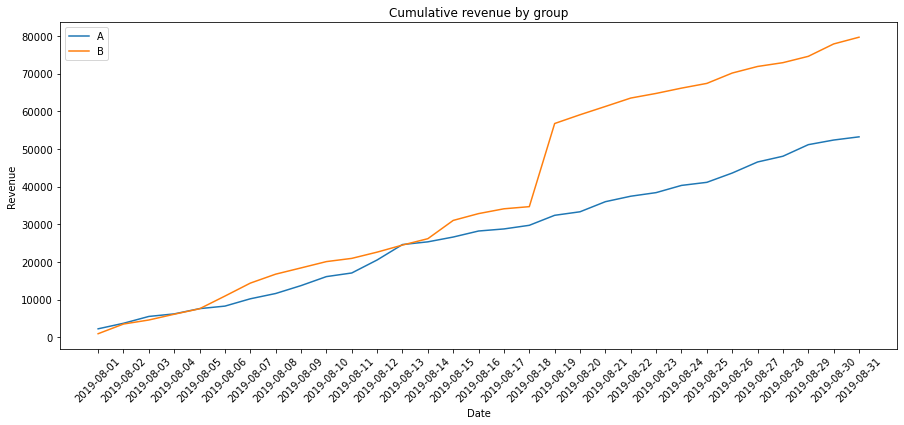

In [37]:
plt.figure(figsize=(15, 6))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.xticks(rotation=45)
plt.title('Cumulative revenue by group')
plt.ylabel('Revenue')
plt.xlabel('Date')
plt.legend()
plt.show()

#### Conclusions and conjectures

Revenue is rising steadily throughout the whole test in both groups. However, group B has a spike in the middle of the test. Reason for it can be surge in the number of orders or very expensive orders in the sample.

### Graph cumulative average order size by group. Make conclusions and conjectures.

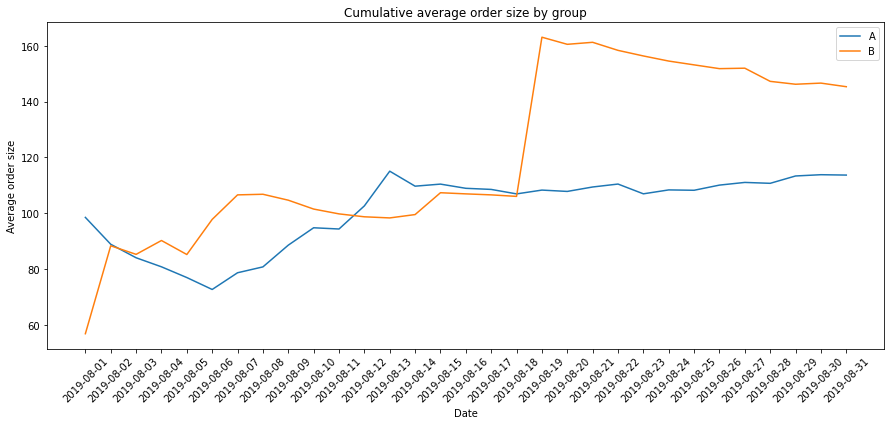

In [38]:
plt.figure(figsize=(15, 6))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.xticks(rotation=45)
plt.title('Cumulative average order size by group')
plt.ylabel('Average order size')
plt.xlabel('Date')
plt.legend()
plt.show()

#### Conclusions and conjectures

Average order size by group is fluctuating till the middle of the test. Group B has a spike in the middle of the test, at the same moment with revenue. After that moments average order size of group A almost stable, while gruop B slowly reducing.

### Graph the relative difference in cumulative average order size for group B compared with group A. Make conclusions and conjectures.

Relative difference graph for the average purchase sizes

In [39]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

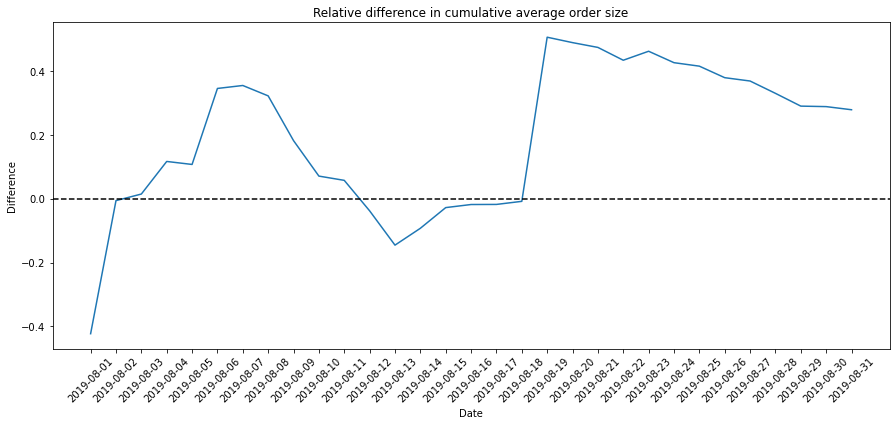

In [40]:
plt.figure(figsize=(15, 6))
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.axhline(y=0, color='black', linestyle='--')

plt.xticks(rotation=45)
plt.title('Relative difference in cumulative average order size')
plt.ylabel('Difference')
plt.xlabel('Date')
plt.show()


Conclusion

At several points the difference between the segments spikes. This means there must be some big orders and outliers.


### Calculate each group's conversion rate as the ratio of orders to the number of visits for each day. Plot the daily conversion rates of the two groups and describe the difference. Draw conclusions and make conjectures.

-  calculating cumulative conversion
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

- selecting data on group A 
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

- selecting data on group B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

- plotting the graphs
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()

- setting the axes' scale
plt.axis(["2019-04-01", '2019-04-23', 0, 0.015])


In [41]:
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

In [42]:
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

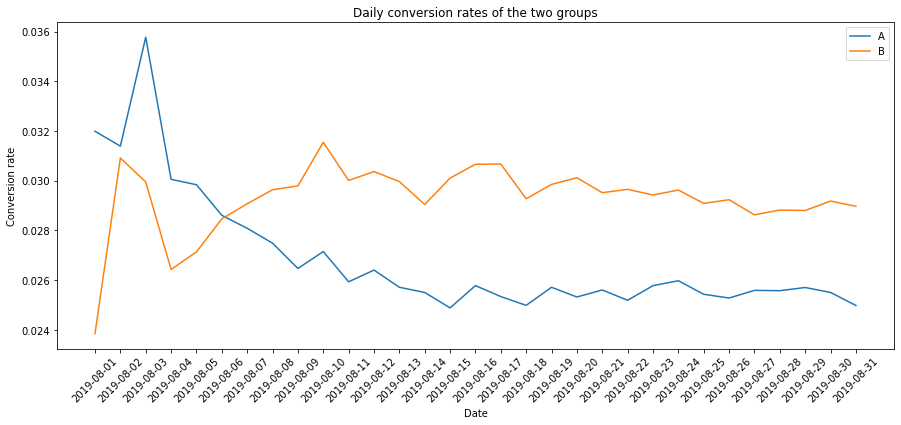

In [43]:
plt.figure(figsize=(15, 6))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.xticks(rotation=45)
plt.title('Daily conversion rates of the two groups')
plt.ylabel('Conversion rate')
plt.xlabel('Date')
plt.legend()
plt.show()

There was big fluctuation in the begging. Then the conversion rate of group A decreased before stabilizing, while the conversion rate of group B rose and then stabilized. So the conversion rate of the group B is better.

Relative difference graph for the cumulative conversion rates:

In [44]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

(0.0, 30.0, -0.3, 0.3)

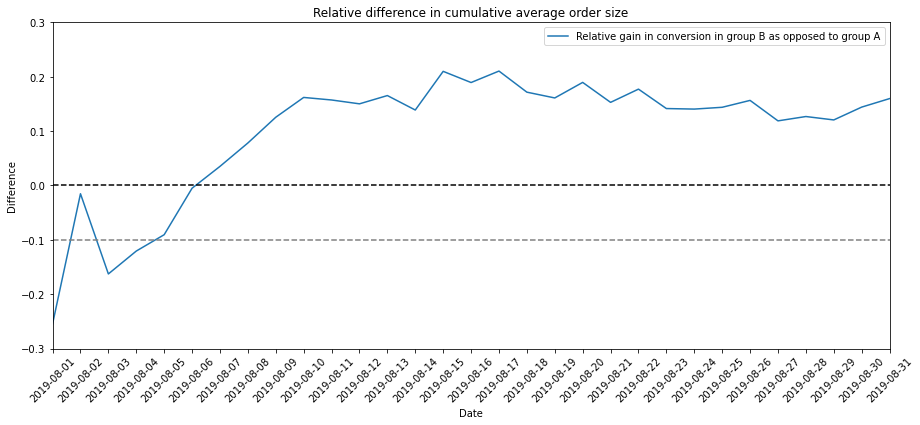

In [45]:
plt.figure(figsize=(15, 6))
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Relative gain in conversion in group B as opposed to group A")
plt.legend()

plt.xticks(rotation=45)
plt.title('Relative difference in cumulative average order size')
plt.ylabel('Difference')
plt.xlabel('Date')

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.1, color='grey', linestyle='--')
plt.axis(["2019-08-01", '2019-08-31', -0.3, 0.3])

### Plot a scatter chart of the number of orders per user. Make conclusions and conjectures.

In [46]:
df_o.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B
5,182168103,935554773,2019-08-15,35.0,B


In [47]:
ordersByUsers = (
    df_o.drop(['group', 'revenue', 'date'], axis=1)
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)

In [48]:
ordersByUsers.columns = ['userId', 'orders']

In [49]:
ordersByUsers.sort_values(by='orders', ascending=False).head(10)

,userId,orders
908,3967698036,3
55,249864742,3
478,2108163459,3
687,2988190573,3
890,3908431265,3
138,611059232,3
632,2742574263,3
157,678354126,2
323,1404560065,2
452,1985475298,2


In [50]:
ordersByUsers['orders'].describe()

count    973.000000
mean       1.044193
std        0.238090
min        1.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        3.000000
Name: orders, dtype: float64

There are users with 3 orders. That is more than a regular user as mean is 1.04.

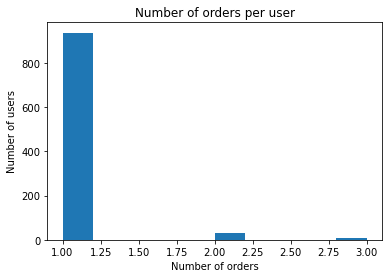

In [51]:
plt.hist(ordersByUsers['orders'])

plt.title('Number of orders per user')
plt.ylabel('Number of users')
plt.xlabel('Number of orders')

plt.show()

Scatter chart with the number of orders per user:

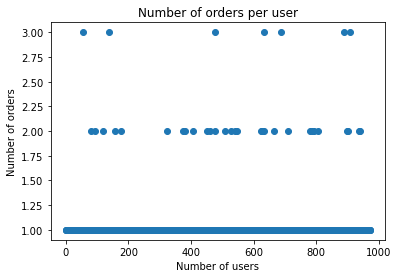

In [52]:
x_values = pd.Series(range(0,len(ordersByUsers)))

plt.scatter(x_values, ordersByUsers['orders'])

plt.title('Number of orders per user')
plt.ylabel('Number of orders')
plt.xlabel('Number of users')
plt.show()

There are a lot of users with two to three orders.

### Calculate the 95th and 99th percentiles for the number of orders per user. Define the point at which a data point becomes an anomaly.

In [53]:
print(np.percentile(ordersByUsers['orders'], [90, 95, 99]))

[1. 1. 2.]


No more than 5% of users placed more than 2 orders, and 10% of users made more than 1.
Thus, it would be reasonable to set 2 orders per user as the lower limit for the number of orders and to filter anomalies on that basis.

### Plot a scatter chart of order prices. Make conclusions and conjectures.

In [54]:
df_o.head(2)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B


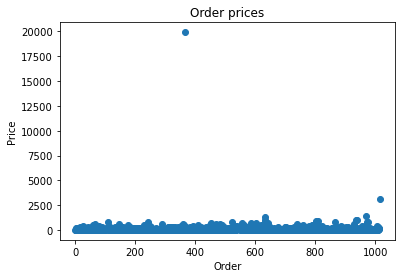

In [55]:
x_values = pd.Series(range(0,len(df_o['revenue'])))
plt.scatter(x_values, df_o['revenue'])
plt.title('Order prices')
plt.ylabel('Price')
plt.xlabel('Order')
plt.show()

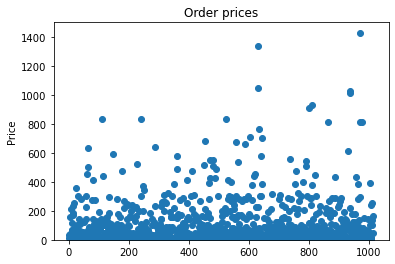

In [56]:
x_values = pd.Series(range(0,len(df_o['revenue'])))
plt.scatter(x_values, df_o['revenue'])
plt.title('Order prices')
plt.ylabel('Price')
plt.ylim(0,1500)
plt.show()

There aren't many orders above 2500 There are outliers of about $5000 - 20000.

### Calculate the 95th and 99th percentiles of order prices. Define the point at which a data point becomes an anomaly.

In [57]:
np.percentile(df_o['revenue'], [90, 95, 99])

array([280.8  , 414.275, 830.3  ])


Not more than 5% of users placed orders that cost more than 414,3. Not more than 1% placed orders more expensive than 830.

Orders more than 400 should be set as outliers.

### Find the statistical significance of the difference in conversion between the groups using the raw data. Make conclusions and conjectures.

In [58]:
df_o['userId'] = df_o['visitorId']

In [59]:
df_o.head(3)

,transactionId,visitorId,date,revenue,group,userId
0,3667963787,3312258926,2019-08-15,30.4,B,3312258926
1,2804400009,3642806036,2019-08-15,15.2,B,3642806036
3,3797467345,1196621759,2019-08-15,155.1,B,1196621759


In [60]:
df_v.head(3)

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507


H0: There is no statistically significant difference in conversion between the groups using the raw data

H1: There is statistically significant difference in conversion between the groups using the raw data

alpha = 0.05

In [61]:
ordersByUsersA = df_o[df_o['group']=='A'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersA.columns = ['userId', 'orders']

In [62]:
ordersByUsersB = df_o[df_o['group']=='B'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersB.columns = ['userId', 'orders']

In [63]:
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(df_v[df_v['group']=='A']['visits'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

In [64]:
sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(df_v[df_v['group']=='B']['visits'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

In [65]:
print("{0:.4f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print("{0:.2f}".format(sampleB.mean()/sampleA.mean()-1))

0.0055
0.16


Conclusion

The p-value is significsntly lower than alpha (0.05), so we reject the null hypothesis. The
raw data analysis showed that the groups' conversion rates have statistically
significant differences. The relative conversion gain for group B compared with
group A is 16%.

### Find the statistical significance of the difference in average order size between the groups using the raw data. Make conclusions and conjectures.

H0: There is no statistically significant difference in average order size between the groups using the raw data

H1: There is statistically significant difference in average order size between the groups using the raw data

alpha = 0.05

In [66]:
'{0:.3f}'.format(stats.mannwhitneyu(df_o[df_o['group']=='A']['revenue'], df_o[df_o['group']=='B']['revenue'])[1])


'0.431'

In [67]:
'{0:.3f}'.format(df_o[df_o['group']=='B']['revenue'].mean()/df_o[df_o['group']=='A']['revenue'].mean()-1)

'0.278'

The p-value is greater than 0.05, so there are no statistically significant differences between the groups' average order sizes. The relative difference is 27.8%.

### Find the statistical significance of the difference in conversion between the groups using the filtered data. Make conclusions and conjectures.


Filtered data is data after removing anomalies - too expensive orders and users with too many orders. Here it would be reasonable to set 1 orders per user as the lower limit for the number of orders and to filter anomalies on that basis. And orders with revenue more than 400 should be set as outliers.

H0: There is no statistically significant difference in average order size between the groups using the filtered data

H1: There is statistically significant difference in average order size between the groups using the filtered data

alpha = 0.05

In [68]:
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 1]['userId'], ordersByUsersB[ordersByUsersB['orders'] > 1]['userId']], axis=0)

In [69]:
usersWithExpensiveOrders = df_o[df_o['revenue'] > 400]['userId']

In [70]:
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0).drop_duplicates().sort_values()

In [71]:
abnormalUsers

568      113298937
1099     148427295
461      154576532
928      204675465
33       249864742
           ...    
940     4003628586
723     4009017467
430     4109358064
743     4133034833
507     4134830387
Name: userId, Length: 91, dtype: int64

In [72]:
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(df_v[df_v['group']=='A']['visits'].sum() - len(ordersByUsersA['orders'])), name='orders')], axis=0)

In [73]:
sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(df_v[df_v['group']=='B']['visits'].sum() - len(ordersByUsersB['orders'])), name='orders')], axis=0)

In [74]:
"{0:.2f}".format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1])


'0.01'

In [75]:
"{0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)

'0.167'

Conclusion

The p-value is significsntly lower than alpha (0.05), so we reject the null hypothesis. The
raw data analysis showed that the groups' conversion rates have statistically
significant differences. Segment B is
much better than segment A


### Find the statistical significance of the difference in average order size between the groups using the filtered data.

H0: There is no statistically significant difference in average order size between the groups using the filtered data

H1: There is statistically significant difference in average order size between the groups using the filtered data

alpha = 0.05

In [76]:
'{0:.3f}'.format(stats.mannwhitneyu(
    df_o[np.logical_and(
        df_o['group']=='A',
        np.logical_not(df_o['userId'].isin(abnormalUsers)))]['revenue'],
    df_o[np.logical_and(
        df_o['group']=='B',
        np.logical_not(df_o['userId'].isin(abnormalUsers)))]['revenue'])[1])


'0.328'

p-value to compare the average order sizes of the filtered groups

In [77]:
'{0:.3f}'.format(
    df_o[np.logical_and(df_o['group']=='B', np.logical_not(df_o['userId'].isin(abnormalUsers)))]['revenue'].mean()/
    df_o[np.logical_and(
        df_o['group']=='A',
        np.logical_not(df_o['userId'].isin(abnormalUsers)))]['revenue'].mean()-1)


'-0.058'

group B's relative gain rounded to three decimal places

There is a statistically significant difference between the groups' average order sizes

### Make a decision based on the test results. The possible decisions are: 1. Stop the test, consider one of the groups the leader. 2. Stop the test, conclude that there is no difference between the groups. 3. Continue the test.


Suggestion is 'Stop the test, consider one of the groups the leader'. Group B has higher conversion, which means more customers and increases revenue.